In [ ]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
import pickle
from keras.regularizers import l2
from  scipy import ndimage

#### Dataset


Load dataset + One-hot encoding + Normalization

In [ ]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # One-hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    # Normalize to [0,1]
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0

    return trainX, trainY, testX, testY

#### Model

Imortant functions

In [ ]:
def train(model, trainX, trainY, testX, testY):
	generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

	train_data = generator.flow(trainX, trainY, batch_size=64)

	results = model.fit(train_data, epochs=100, validation_data=(testX, testY), verbose=1)

	return results

def evaluate(model, testX, testY):
    _, acc = model.evaluate(testX, testY, verbose=0)

    print(f"The model achieved a final accuracy of {acc*100:.2f}%")

def plot_results(history):
	plt.title('Cross Entropy Loss')
	plt.plot(history['loss'], color='blue', label='Training loss')
	plt.plot(history['val_loss'], color='orange', label='Validation/test loss')
	plt.legend()
	plt.show()

	plt.title('Classification Accuracy')
	plt.plot(history['accuracy'], color='blue', label='Training accuracy')
	plt.plot(history['val_accuracy'], color='orange', label='Validation/test accuracy')
	plt.legend()
	plt.show()

In [ ]:
def save_model(filename, model):
    filename = '/content/models/' + filename
    pickle.dump(model, open(filename, 'wb'))

def save_history(filename, history):
    filename = '/content/history/' + filename
    pickle.dump(history, open(filename, 'wb'))

def load_model(filename):
    filename = '/content/models/' + filename
    model = pickle.load(open(filename, 'rb'))
    return model

def load_history(filename):
    filename = '/content/history/' + filename
    history = pickle.load(open(filename, 'rb'))
    return history

Baseline model

In [ ]:
def dropout_model():
    # Create architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Optimization method
    opt = SGD(learning_rate=0.01, momentum=0.9)

    # Compile model and choose loss type
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
trainX, trainY, testX, testY = load_dataset()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
model = dropout_model()
results = train(model, trainX, trainY, testX, testY)

Epoch 1/100
782/782 [==============================] - 40s 44ms/step - loss: 2.0241 - accuracy: 0.2355 - val_loss: 1.7212 - val_accuracy: 0.3679
Epoch 2/100
782/782 [==============================] - 32s 41ms/step - loss: 1.6999 - accuracy: 0.3627 - val_loss: 1.4592 - val_accuracy: 0.4669
Epoch 3/100
782/782 [==============================] - 35s 45ms/step - loss: 1.5329 - accuracy: 0.4390 - val_loss: 1.3265 - val_accuracy: 0.5182
Epoch 4/100
782/782 [==============================] - 34s 43ms/step - loss: 1.4275 - accuracy: 0.4819 - val_loss: 1.2292 - val_accuracy: 0.5490
Epoch 5/100
782/782 [==============================] - 33s 42ms/step - loss: 1.3515 - accuracy: 0.5139 - val_loss: 1.1874 - val_accuracy: 0.5725
Epoch 6/100
782/782 [==============================] - 31s 40ms/step - loss: 1.2729 - accuracy: 0.5453 - val_loss: 1.0206 - val_accuracy: 0.6286
Epoch 7/100
782/782 [==============================] - 33s 42ms/step - loss: 1.2199 - accuracy: 0.5679 - val_loss: 1.1406 - val_ac

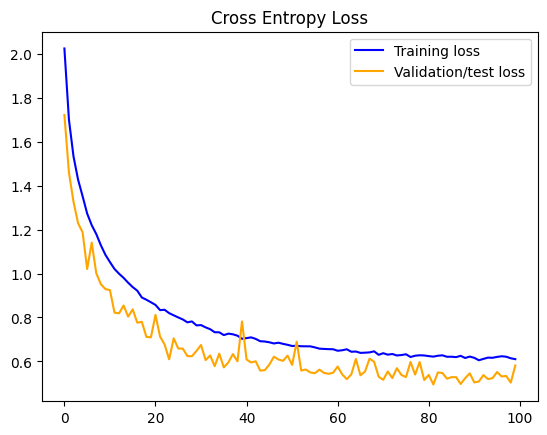

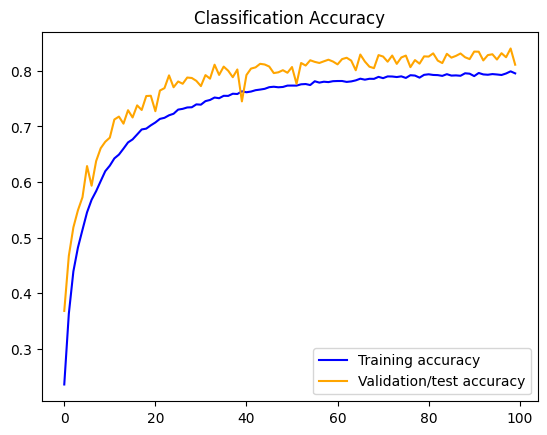

The model achieved a final accuracy of 81.10%


In [ ]:
plot_results(results.history)
evaluate(model, testX, testY)

In [ ]:
save_model('dropout_augment_model_experiment4', model)
save_history('dropout_augment_model_experiment4', results.history)

In [ ]:
from google.colab import files
files.download('/content/models/dropout_augment_model_experiment4')
files.download('/content/history/dropout_augment_model_experiment4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test = load_model('dropout_augment_model_experiment4')
history_test = load_history('dropout_augment_model_experiment4')

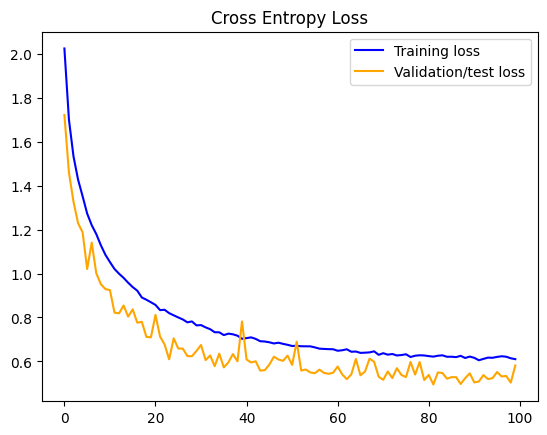

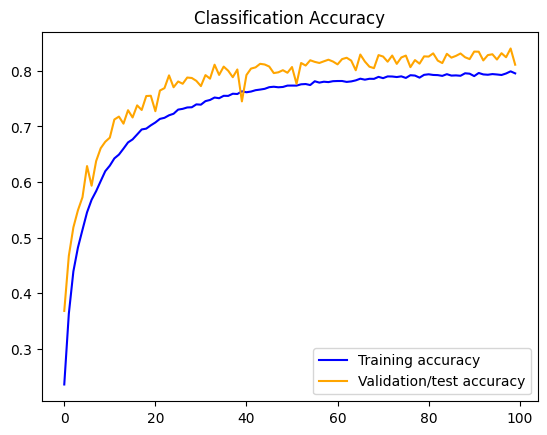

The model achieved a final accuracy of 81.10%


In [ ]:
plot_results(history_test)
evaluate(test, testX, testY)